In [ ]:
import mne
from Python_Processing.Data_extractions import  extract_data_from_subject
from Python_Processing.Data_processing import  select_time_window, transform_for_classificator

: 

In [ ]:
### Hyperparameters

# The root dir has to point to the folder that contains the database
root_dir = "../data/"

# Data Type
datatype = "EEG"

# Sampling rate
fs = 256

# Select the useful par of each trial. Time in seconds
t_start = 1.5
t_end = 3.5

# Subject number
N_S = 1   #[1 to 10]

In [ ]:
#@title Data extraction and processing

# Load all trials for a single subject
X, Y = extract_data_from_subject(root_dir, N_S, datatype)

# Cut useful time. i.e action interval
X_yes = select_time_window(X = X, t_start = 2.0, t_end = 2.5, fs = fs)
X_no = select_time_window(X = X, t_start = 4.0, t_end = 4.5, fs = fs)

In [ ]:
print("Data shape: [trials x channels x samples]")
print(X_yes.shape) # Trials, channels, samples
print(X_no.shape) # Trials, channels, samples

print("Labels shape")
print(Y.shape) # Time stamp, class , condition, session

Data shape: [trials x channels x samples]
(500, 128, 128)
(500, 128, 128)
Labels shape
(500, 4)


In [ ]:
# Conditions to compared
# Conditions = [["PRON"],["PRON"],["PRON"],["PRON"]]
Conditions = [["IN"],["IN"],["IN"],["IN"]]
# The class for the above condition
Classes    = [  ["Up"] ,["Down"],["Left"],["Right"] ]

In [ ]:
# Transform data and keep only the trials of interes
X_yes , Y =  transform_for_classificator(X_yes, Y, Classes, Conditions)

In [ ]:
import numpy as np

In [ ]:
X_all = np.concatenate([X_yes, X_no[:50]], axis=0)
y_all = np.concatenate([Y, np.full(50, 4)])

In [ ]:
print("Final data shape")
print(X_all.shape)

print("Final labels shape")
print(y_all.shape) 

Final data shape
(250, 128, 128)
Final labels shape
(250,)


In [ ]:
n_epochs = 250
n_channels = 128      # チャンネル数
n_samples = 128      # サンプル数
sfreq = 256           # サンプリング周波数 (Hz)
ch_names = [f'EEG {i+1}' for i in range(n_channels)]  # チャンネル名のリスト
ch_types = ['eeg'] * n_channels                        # 各チャンネルのタイプを'eeg'に設定
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)
event_ids = {f'event_{i + 1}': i + 1 for i in range(n_epochs)}
events = np.array([[i, 0, i+1] for i in range(n_epochs)])  # 各エポックにイベントID
epochs = mne.EpochsArray(X_all, info, events=events, event_id=event_ids)

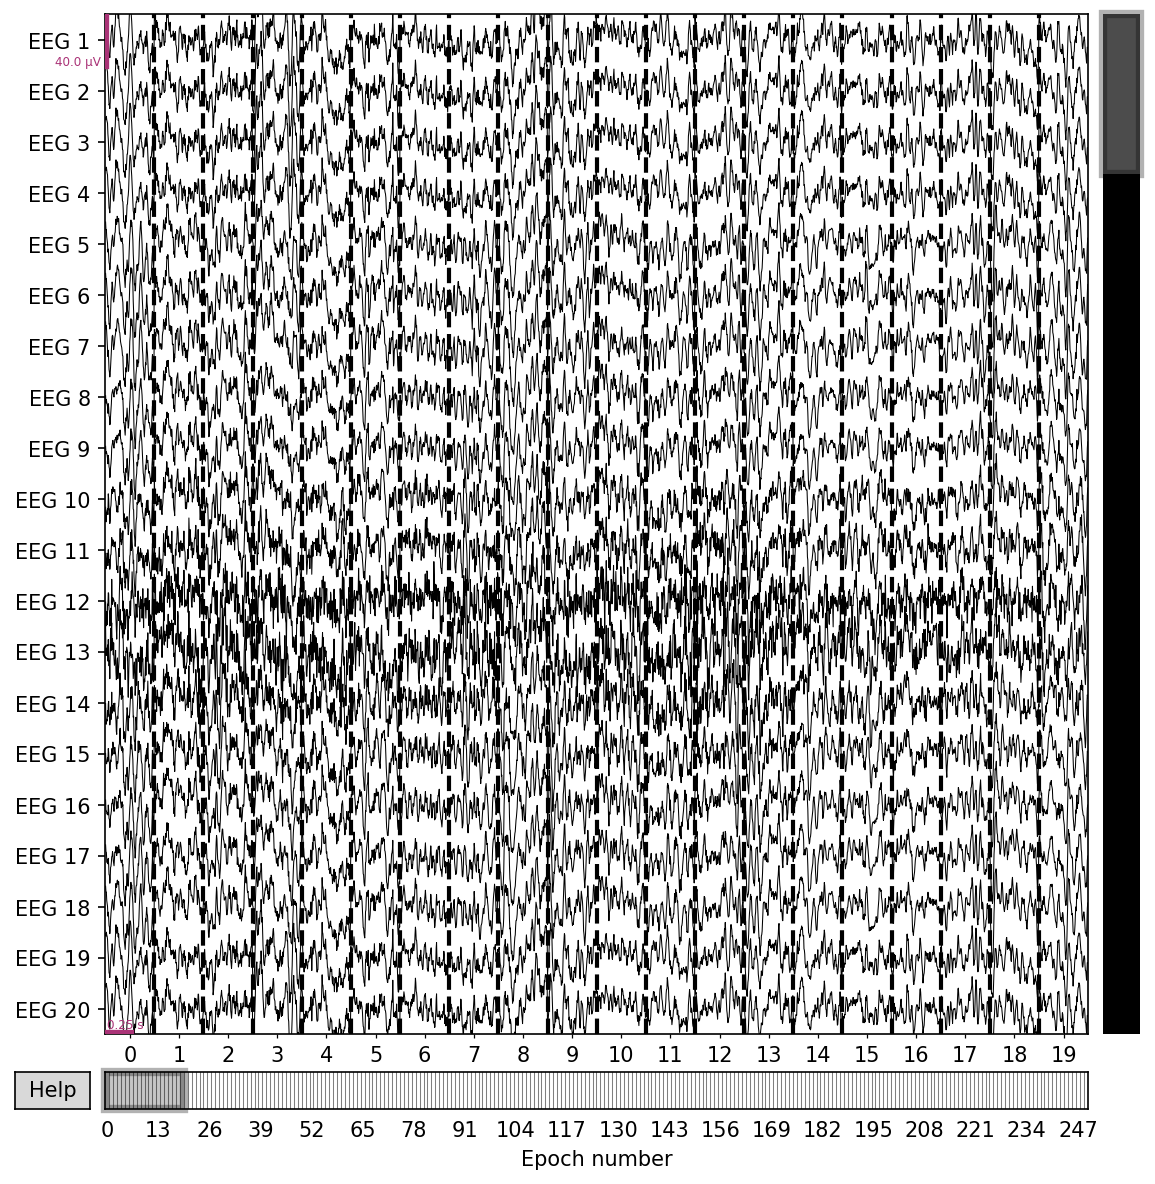

Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
none
Attempting to create new mne-python configuration file:
C:\Users\wataa\.mne\mne-python.json


In [ ]:
%matplotlib qt
epochs.plot()

In [25]:
epochs[0,2,3]

<EpochsArray | 3 events (all good), 0 – 0.496 s (baseline off), ~485 kB, data loaded,
 'event_1': 1
 'event_3': 1
 'event_4': 1>

In [26]:
epochs[0,50,100,150,200].plot_image()

Not setting metadata
5 matching events found
No baseline correction applied
0 projection items activated
combining channels using GFP (eeg channels)


[<Figure size 960x720 with 3 Axes>]

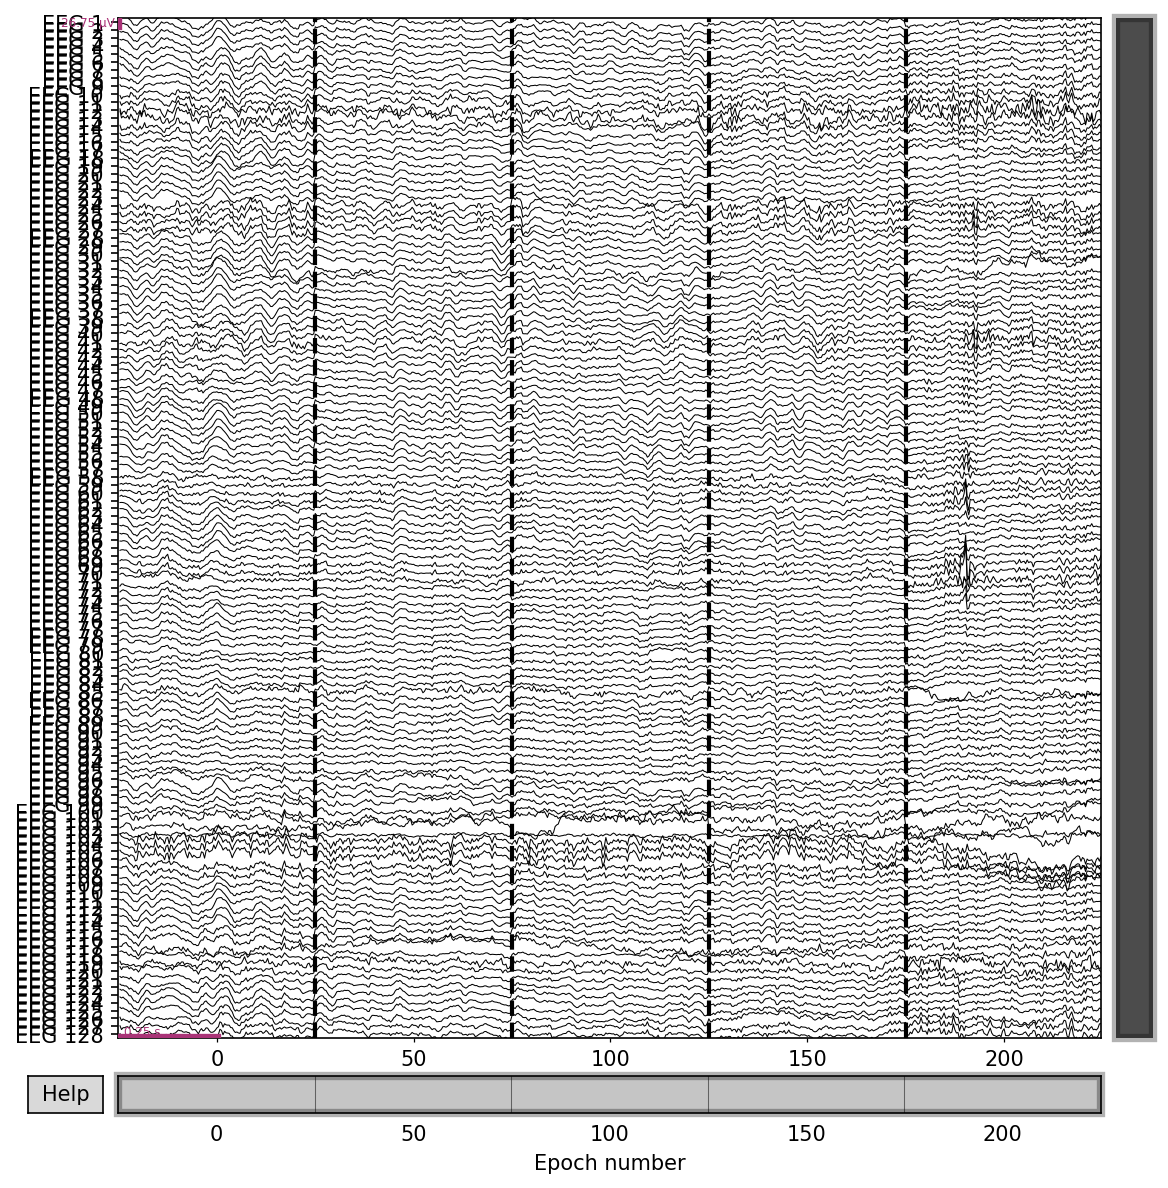

Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
none
Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
none
Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
none
Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
none


In [ ]:
epochs[0,50,100,150,200].plot(n_channels=128, scalings="auto")